# HDS5210-2022 final project
## House price survey in St. Louis area
A friend of mine is thinking about buying a real estate in St. Louis recently and asked me if I have any recommendations. I think I can just use what I learned in this course to do some preliminary analysis for him to help him make a correct and reasonable decision. So I revised my original final project plan to explore the housing prices in St. Louis. :-)

### The website I used
All my data come from zillow (https://www.zillow.com/).
I use two ready-made chrome plug-ins to get data.
- chrome.google.com/webstore/detail/export-zillow-data-to-exc/ncdkikkacogkekgnnmmiokebkkcblena
- chrome.google.com/webstore/detail/zillow-to-excel/aecdekdgjlncaadbdiciepplaobhcjgi?hl=en

Because of the limitation of plug-in and the difference of internal logic, the tables I get are also different. Next, I will use what I learned in this class for data analysis.

## Load module

In [1]:
import pandas as pd
import numpy as np

## Import Datasets

### impor from website

In [4]:
URL='https://raw.githubusercontent.com/DamonChen-slu/hds5210-2022/main/Export_Zillow_data_to_Excel.csv'
file1 = pd.read_csv(URL,index_col=0)
file1.shape

(25, 23)

In [5]:
file1.head(5)

,statusType,statusText,timeOnZillow,price,pricePerSqFt,zestimate,zestimatePerSqFt,rentZestimate,area,lotSize,...,address,addressStreet,addressCity,addressState,addressZipcode,latitude,longitude,brokerName,isZillowOwned,detailUrl
zid,,,,,,,,,,,,,,,,,,,,,
2707643,FOR_SALE,Foreclosure,NaN,69900,68,101300.0,98.0,1099.0,1033,6272.640,...,"8041 Titus Rd, Saint Louis, MO 63114",8041 Titus Rd,Saint Louis,MO,63114,38.691387,-90.330650,RE/MAX Best Choice St. Louis,False,https://www.zillow.com/homedetails/8041-Titus-...
2659560,FOR_SALE,House for sale,NaN,50000,48,53600.0,52.0,874.0,1040,0.253,...,"9801 Diamond Dr, Saint Louis, MO 63137",9801 Diamond Dr,Saint Louis,MO,63137,38.743946,-90.210380,"The Realty Dot, Inc",False,https://www.zillow.com/homedetails/9801-Diamon...
2645780,FOR_SALE,House for sale,NaN,54500,50,NaN,NaN,NaN,1080,8450.640,...,"10043 Diamond Dr, Saint Louis, MO 63137",10043 Diamond Dr,Saint Louis,MO,63137,38.749714,-90.211365,Coldwell Banker Realty - Gunda,False,https://www.zillow.com/homedetails/10043-Diamo...
2634846,FOR_SALE,House for sale,NaN,75000,82,76300.0,84.0,931.0,912,0.259,...,"10439 Coburg Lands Dr, Saint Louis, MO 63137",10439 Coburg Lands Dr,Saint Louis,MO,63137,38.760510,-90.224340,Worth Clark Realty,False,https://www.zillow.com/homedetails/10439-Cobur...
2655299,FOR_SALE,House for sale,NaN,56000,58,NaN,NaN,995.0,960,5357.880,...,"6147 Shillington Ln, Saint Louis, MO 63134",6147 Shillington Ln,Saint Louis,MO,63134,38.748222,-90.321170,"Sandy Bender, Real Estate",False,https://www.zillow.com/homedetails/6147-Shilli...


In [6]:
file1.dtypes

statusType           object
statusText           object
timeOnZillow        float64
price                 int64
pricePerSqFt          int64
zestimate           float64
zestimatePerSqFt    float64
rentZestimate       float64
area                  int64
lotSize             float64
lotAreaUnit          object
beds                  int64
baths                 int64
address              object
addressStreet        object
addressCity          object
addressState         object
addressZipcode        int64
latitude            float64
longitude           float64
brokerName           object
isZillowOwned          bool
detailUrl            object
dtype: object

### import from local

In [7]:
file2 = pd.read_excel("TotalSearchResults.xlsx")
file2.shape

(367, 23)

In [8]:
file2.head(5)

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/1504-E-Swan...,214800.0,200000,1294.0,Not specified,1.0,2.0,864.0,NaN,CONDO,...,MO,USA,Keller Williams Chesterfield,False,1.0,False,False,For Sale (Broker),Condo for sale,FOR_SALE
1,https://www.zillow.com/homedetails/3241-Edgar-...,226100.0,200000,1264.0,Not specified,2.0,2.0,1048.0,NaN,SINGLE_FAMILY,...,MO,USA,Red Key Realty St. Louis,False,1.0,False,False,Coming Soon,Coming soon,FOR_SALE
2,https://www.zillow.com/homedetails/717-Zeiss-A...,NaN,200000,NaN,Not specified,2.0,3.0,1582.0,NaN,SINGLE_FAMILY,...,MO,USA,Realty Executives of St. Louis,False,1.0,False,False,For Sale (Broker),House for sale,FOR_SALE
3,https://www.zillow.com/homedetails/5775-Birch-...,NaN,200000,2027.0,Not specified,4.0,3.0,1330.0,NaN,SINGLE_FAMILY,...,MO,USA,L.K. Wood Realty Services Inc,False,1.0,False,False,For Sale (Broker),House for sale,FOR_SALE
4,https://www.zillow.com/homedetails/4132-92nd-A...,NaN,199900,NaN,Not specified,2.0,2.0,1197.0,NaN,SINGLE_FAMILY,...,MO,USA,Keller Williams Realty West,False,1.0,False,False,For Sale (Broker),House for sale,FOR_SALE


In [9]:
file2.dtypes

Url                object
Zestimate         float64
Price               int64
Rent Zestimate    float64
Days On Zillow     object
Bathrooms         float64
Bedrooms          float64
Living Area       float64
Lot Size          float64
Home Type          object
Street Address     object
City               object
Zip                 int64
State              object
Country            object
Broker Name        object
Has 3D Model         bool
Has Image         float64
Has Video            bool
isZillowOwned        bool
sgapt              object
statusText         object
statusType         object
dtype: object

# Data analysis(Data Aggregation& Pivoting and Transformation)

### remove the NA colmns

In [10]:
# Drop NA value
file1.dropna(axis=1,how="all").head(5)

,statusType,statusText,price,pricePerSqFt,zestimate,zestimatePerSqFt,rentZestimate,area,lotSize,lotAreaUnit,...,address,addressStreet,addressCity,addressState,addressZipcode,latitude,longitude,brokerName,isZillowOwned,detailUrl
zid,,,,,,,,,,,,,,,,,,,,,
2707643,FOR_SALE,Foreclosure,69900,68,101300.0,98.0,1099.0,1033,6272.640,sqft,...,"8041 Titus Rd, Saint Louis, MO 63114",8041 Titus Rd,Saint Louis,MO,63114,38.691387,-90.330650,RE/MAX Best Choice St. Louis,False,https://www.zillow.com/homedetails/8041-Titus-...
2659560,FOR_SALE,House for sale,50000,48,53600.0,52.0,874.0,1040,0.253,acres,...,"9801 Diamond Dr, Saint Louis, MO 63137",9801 Diamond Dr,Saint Louis,MO,63137,38.743946,-90.210380,"The Realty Dot, Inc",False,https://www.zillow.com/homedetails/9801-Diamon...
2645780,FOR_SALE,House for sale,54500,50,NaN,NaN,NaN,1080,8450.640,sqft,...,"10043 Diamond Dr, Saint Louis, MO 63137",10043 Diamond Dr,Saint Louis,MO,63137,38.749714,-90.211365,Coldwell Banker Realty - Gunda,False,https://www.zillow.com/homedetails/10043-Diamo...
2634846,FOR_SALE,House for sale,75000,82,76300.0,84.0,931.0,912,0.259,acres,...,"10439 Coburg Lands Dr, Saint Louis, MO 63137",10439 Coburg Lands Dr,Saint Louis,MO,63137,38.760510,-90.224340,Worth Clark Realty,False,https://www.zillow.com/homedetails/10439-Cobur...
2655299,FOR_SALE,House for sale,56000,58,NaN,NaN,995.0,960,5357.880,sqft,...,"6147 Shillington Ln, Saint Louis, MO 63134",6147 Shillington Ln,Saint Louis,MO,63134,38.748222,-90.321170,"Sandy Bender, Real Estate",False,https://www.zillow.com/homedetails/6147-Shilli...


In [11]:
file1 = file1.drop(['statusType','zestimatePerSqFt','latitude','longitude','brokerName','isZillowOwned','detailUrl','zestimate','rentZestimate','timeOnZillow','statusText'], axis=1)

In [12]:
file1_unit = file1['lotAreaUnit'] == 'sqft'
file1[file1_unit]

,price,pricePerSqFt,area,lotSize,lotAreaUnit,beds,baths,address,addressStreet,addressCity,addressState,addressZipcode
zid,,,,,,,,,,,,
2707643,69900,68,1033,6272.64,sqft,3,1,"8041 Titus Rd, Saint Louis, MO 63114",8041 Titus Rd,Saint Louis,MO,63114
2645780,54500,50,1080,8450.64,sqft,2,1,"10043 Diamond Dr, Saint Louis, MO 63137",10043 Diamond Dr,Saint Louis,MO,63137
2655299,56000,58,960,5357.88,sqft,3,1,"6147 Shillington Ln, Saint Louis, MO 63134",6147 Shillington Ln,Saint Louis,MO,63134
2655446,59900,83,720,6141.96,sqft,2,1,"8045 Busiek Ave, Saint Louis, MO 63134",8045 Busiek Ave,Saint Louis,MO,63134
2869837,200000,126,1582,7797.24,sqft,3,2,"717 Zeiss Ave, Saint Louis, MO 63125",717 Zeiss Ave,Saint Louis,MO,63125
2679894,165000,95,1728,6490.44,sqft,3,2,"9242 Guthrie Ave, Saint Louis, MO 63134",9242 Guthrie Ave,Saint Louis,MO,63134
2630626,155000,142,1092,7492.32,sqft,3,2,"210 Saint Edward Ln, Florissant, MO 63033",210 Saint Edward Ln,Florissant,MO,63033
2653297,85000,69,1232,10367.28,sqft,3,2,"7 Forestwood Dr, Saint Louis, MO 63135",7 Forestwood Dr,Saint Louis,MO,63135
2650535,79900,67,1200,7492.32,sqft,4,1,"9839 Vickie Pl, Saint Louis, MO 63136",9839 Vickie Pl,Saint Louis,MO,63136


In [13]:
file2 = file2[['Price','Bathrooms','Bedrooms','Living Area','Home Type','Street Address','Zip']]

In [14]:
file2.head()

,Price,Bathrooms,Bedrooms,Living Area,Home Type,Street Address,Zip
0,200000,1.0,2.0,864.0,CONDO,1504 E Swan Cir,63144
1,200000,2.0,2.0,1048.0,SINGLE_FAMILY,3241 Edgar Ave,63143
2,200000,2.0,3.0,1582.0,SINGLE_FAMILY,717 Zeiss Ave,63125
3,200000,4.0,3.0,1330.0,SINGLE_FAMILY,5775 Birch Hollow Dr,63129
4,199900,2.0,2.0,1197.0,SINGLE_FAMILY,4132 92nd Ave,63034


## Find out the highest and lowest prices in the two files and their address.

In [15]:
file1["price"].agg(['min','max','mean','median','std','count'])

min        50000.000000
max       200000.000000
mean      123471.960000
median    130000.000000
std        50485.743592
count         25.000000
Name: price, dtype: float64

In [16]:
file1_price_add = file1[["price","address"]]
print(file1_price_add.sort_values(by='price', ascending=False).head(1))
file1_price_add.sort_values(by='price', ascending=True).head(1)

          price                               address
zid                                                  
2869837  200000  717 Zeiss Ave, Saint Louis, MO 63125


,price,address
zid,,
2659560,50000,"9801 Diamond Dr, Saint Louis, MO 63137"


**The higest price of file1 is \$*200,000* in 717 Zeiss Ave, Saint Louis, MO 63125, lowest price is \$*50,000* in 9801 Diamond Dr, Saint Louis, MO 63137**

In [17]:
file2["Price"].agg(['min','max','mean','median','std','count'])

min        50000.000000
max       498900.000000
mean      126194.994550
median    114900.000000
std        59852.937557
count        367.000000
Name: Price, dtype: float64

In [18]:
file2_price_add = file2[["Price","Street Address"]]
print(file2_price_add.sort_values(by='Price', ascending=False).head(1))
file2_price_add.sort_values(by='Price', ascending=True).head(1)

     Price         Street Address
51  498900  1 Hermitage Ii At Smt


,Price,Street Address
128,50000,6728 Raymond Ave


**The higest price of file2 is \$*498,900* in 498900  1 Hermitage Ii At Smt, lowest price is \$*50,000* in 6728 Raymond Ave**

## Do statistics on the types of houses.

In [19]:
file2['Home Type'].value_counts()

SINGLE_FAMILY    333
CONDO             26
TOWNHOUSE          7
APARTMENT          1
Name: Home Type, dtype: int64

### My friend want the house type is **SINGLE_FAMILY** and have **2 bedrooms** **2 bathrooms**

In [20]:
file1[(file1['beds'] == 2) & (file1['baths'] == 2 )]

,price,pricePerSqFt,area,lotSize,lotAreaUnit,beds,baths,address,addressStreet,addressCity,addressState,addressZipcode
zid,,,,,,,,,,,,
2914184,199900,123,1630,9452.52,sqft,2,2,"171 Bridgeview Ln, Saint Louis, MO 63129",171 Bridgeview Ln,Saint Louis,MO,63129
2906201,159900,103,1550,7318.08,sqft,2,2,"3300 Briarcourt Dr, Saint Louis, MO 63125",3300 Briarcourt Dr,Saint Louis,MO,63125
2693045,111000,86,1289,5575.68,sqft,2,2,"6943 Groveland Dr, Saint Louis, MO 63121",6943 Groveland Dr,Saint Louis,MO,63121


In [21]:
file2_ideal_house = file2[(file2['Bathrooms'] == 2.0 ) & (file2['Bedrooms'] == 2.0 ) & (file2['Home Type'] == 'SINGLE_FAMILY' )]
print(file2_ideal_house)
file2_ideal_house.shape

      Price  Bathrooms  Bedrooms  Living Area      Home Type  \
1    200000        2.0       2.0       1048.0  SINGLE_FAMILY   
4    199900        2.0       2.0       1197.0  SINGLE_FAMILY   
10   199900        2.0       2.0       1630.0  SINGLE_FAMILY   
69    99999        2.0       2.0       1014.0  SINGLE_FAMILY   
95    64900        2.0       2.0       1064.0  SINGLE_FAMILY   
101   59900        2.0       2.0        816.0  SINGLE_FAMILY   
152   72000        2.0       2.0       1097.0  SINGLE_FAMILY   
161   65500        2.0       2.0        956.0  SINGLE_FAMILY   
198   83000        2.0       2.0       1274.0  SINGLE_FAMILY   
202   82900        2.0       2.0        792.0  SINGLE_FAMILY   
225  111000        2.0       2.0       1289.0  SINGLE_FAMILY   
230  110000        2.0       2.0        968.0  SINGLE_FAMILY   
255  137000        2.0       2.0       1032.0  SINGLE_FAMILY   
280  125000        2.0       2.0        784.0  SINGLE_FAMILY   
285  120000        2.0       2.0       1

(21, 7)

### My friend's budget is 15,000 to 18,000, which is marked by a function. If it is higher than this range, it will be marked as "too expensive", otherwise it will be marked as "too cheap".

In [28]:
def price_label(df, column='price'):
    pass

## From file1, the relationship of price per Sqft and the area

In [36]:
file1_price_area = file1[['area','pricePerSqFt']]

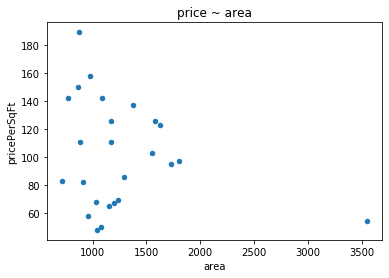

In [37]:
file1_price_area.plot(kind='scatter',x='area',y='pricePerSqFt', title="price ~ area")

# Data integration(Data merge)

In [38]:
file1.head(1)

,price,pricePerSqFt,area,lotSize,lotAreaUnit,beds,baths,address,addressStreet,addressCity,addressState,addressZipcode
zid,,,,,,,,,,,,
2707643,69900,68,1033,6272.64,sqft,3,1,"8041 Titus Rd, Saint Louis, MO 63114",8041 Titus Rd,Saint Louis,MO,63114


In [39]:
file2.head(1)

,Price,Bathrooms,Bedrooms,Living Area,Home Type,Street Address,Zip
0,200000,1.0,2.0,864.0,CONDO,1504 E Swan Cir,63144


In [42]:
file1_new = file1.rename(columns={'price':'Price','beds':'Bedrooms','baths':'Bathrooms','addressZipcode':'Zip','addressStreet':'Street Address','area':'Living Area'},inplace=False)
file1_new

,Price,pricePerSqFt,Living Area,lotSize,lotAreaUnit,Bedrooms,Bathrooms,address,Street Address,addressCity,addressState,Zip
zid,,,,,,,,,,,,
2707643,69900,68,1033,6272.640,sqft,3,1,"8041 Titus Rd, Saint Louis, MO 63114",8041 Titus Rd,Saint Louis,MO,63114
2659560,50000,48,1040,0.253,acres,2,1,"9801 Diamond Dr, Saint Louis, MO 63137",9801 Diamond Dr,Saint Louis,MO,63137
2645780,54500,50,1080,8450.640,sqft,2,1,"10043 Diamond Dr, Saint Louis, MO 63137",10043 Diamond Dr,Saint Louis,MO,63137
2634846,75000,82,912,0.259,acres,3,2,"10439 Coburg Lands Dr, Saint Louis, MO 63137",10439 Coburg Lands Dr,Saint Louis,MO,63137
2655299,56000,58,960,5357.880,sqft,3,1,"6147 Shillington Ln, Saint Louis, MO 63134",6147 Shillington Ln,Saint Louis,MO,63134
2665082,75000,65,1155,0.265,acres,4,1,"410 S Harvey Ave, Saint Louis, MO 63135",410 S Harvey Ave,Saint Louis,MO,63135
2655446,59900,83,720,6141.960,sqft,2,1,"8045 Busiek Ave, Saint Louis, MO 63134",8045 Busiek Ave,Saint Louis,MO,63134
2869837,200000,126,1582,7797.240,sqft,3,2,"717 Zeiss Ave, Saint Louis, MO 63125",717 Zeiss Ave,Saint Louis,MO,63125
2679894,165000,95,1728,6490.440,sqft,3,2,"9242 Guthrie Ave, Saint Louis, MO 63134",9242 Guthrie Ave,Saint Louis,MO,63134


In [53]:
total = pd.merge(file1_new,file2,how='outer',on=['Price','Bedrooms','Bathrooms','Zip'])

In [57]:
total

,Price,pricePerSqFt,Living Area_x,lotSize,lotAreaUnit,Bedrooms,Bathrooms,address,Street Address_x,addressCity,addressState,Zip,Living Area_y,Home Type,Street Address_y
0,69900,68.0,1033.0,6272.640,sqft,3.0,1.0,"8041 Titus Rd, Saint Louis, MO 63114",8041 Titus Rd,Saint Louis,MO,63114,1033.0,SINGLE_FAMILY,8041 Titus Rd
1,50000,48.0,1040.0,0.253,acres,2.0,1.0,"9801 Diamond Dr, Saint Louis, MO 63137",9801 Diamond Dr,Saint Louis,MO,63137,1040.0,SINGLE_FAMILY,9801 Diamond Dr
2,54500,50.0,1080.0,8450.640,sqft,2.0,1.0,"10043 Diamond Dr, Saint Louis, MO 63137",10043 Diamond Dr,Saint Louis,MO,63137,1080.0,SINGLE_FAMILY,10043 Diamond Dr
3,75000,82.0,912.0,0.259,acres,3.0,2.0,"10439 Coburg Lands Dr, Saint Louis, MO 63137",10439 Coburg Lands Dr,Saint Louis,MO,63137,927.0,SINGLE_FAMILY,229 Roderick Dr
4,75000,82.0,912.0,0.259,acres,3.0,2.0,"10439 Coburg Lands Dr, Saint Louis, MO 63137",10439 Coburg Lands Dr,Saint Louis,MO,63137,912.0,SINGLE_FAMILY,10439 Coburg Lands Dr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,165000,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,63121,1040.0,SINGLE_FAMILY,3336 N Hanley Rd
364,164900,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,63031,888.0,SINGLE_FAMILY,1480 Layven Ave
365,162000,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,63114,1120.0,SINGLE_FAMILY,8621 Forest Ave
366,160000,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,63033,1618.0,SINGLE_FAMILY,12051 Jerries Ln


In [55]:
total.shape

(368, 15)

# Data result(Data Visualization,Aggregation and Transformation )

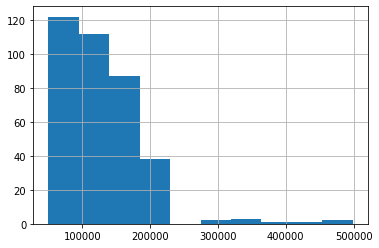

In [56]:
total["Price"].hist()

In [50]:
total["Price"].agg(['min','max','mean','median','std','count'])

min        50000.00000
max       200000.00000
mean      119472.00000
median    111000.00000
std        50193.77053
count         25.00000
Name: Price, dtype: float64

In [ ]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git pull
    !git add .
    !git commit -a -m "Submitting the final programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')